# PREDICTING FUTURE CONFIRMED CASES USING FACEBOOK PROPHET 



In [ ]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

from google.colab import files
uploaded = files.upload()
import io
india_df = pd.read_csv(io.BytesIO(uploaded['state_level_daily.csv']))

Saving state_level_daily.csv to state_level_daily (1).csv


In [ ]:
# Let's view the head of the training dataset
india_df.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,3,01-Apr-20,AS,15,0,0,Assam
4,4,01-Apr-20,BR,3,0,0,Bihar


In [ ]:

india_df.tail(20)

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
4543,4543,31-May-20,LD,0,0,0,Lakshadweep
4544,4544,31-May-20,MH,2487,89,1248,Maharashtra
4545,4545,31-May-20,ML,0,0,0,Meghalaya
4546,4546,31-May-20,MN,11,0,5,Manipur
4547,4547,31-May-20,MP,198,7,398,Madhya Pradesh
4548,4548,31-May-20,MZ,0,0,0,Mizoram
4549,4549,31-May-20,NL,7,0,0,Nagaland
4550,4550,31-May-20,OR,129,0,76,Odisha
4551,4551,31-May-20,PB,30,1,20,Punjab
4552,4552,31-May-20,PY,13,0,2,Puducherry


In [ ]:
india_df.describe()

,Unnamed: 0,Confirmed,Deceased,Recovered
count,4563.000000,4563.000000,4563.000000,4563.000000
mean,2281.000000,337.038133,9.268245,208.877931
std,1317.368969,1607.292009,54.071428,1110.055208
min,0.000000,-1295.000000,-1.000000,-19.000000
25%,1140.500000,0.000000,0.000000,0.000000
50%,2281.000000,8.000000,0.000000,1.000000
75%,3421.500000,111.000000,1.000000,52.000000
max,4562.000000,25561.000000,2004.000000,19999.000000


In [ ]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4563 non-null   int64 
 1   Date        4563 non-null   object
 2   State       4563 non-null   object
 3   Confirmed   4563 non-null   int64 
 4   Deceased    4563 non-null   int64 
 5   Recovered   4563 non-null   int64 
 6   State_Name  4563 non-null   object
dtypes: int64(4), object(3)
memory usage: 249.7+ KB


# TASK #3: EXPLORE DATASET  

In [ ]:
india_df['Date'] = pd.to_datetime(india_df['Date'])
india_df = india_df.sort_values(by="Date")


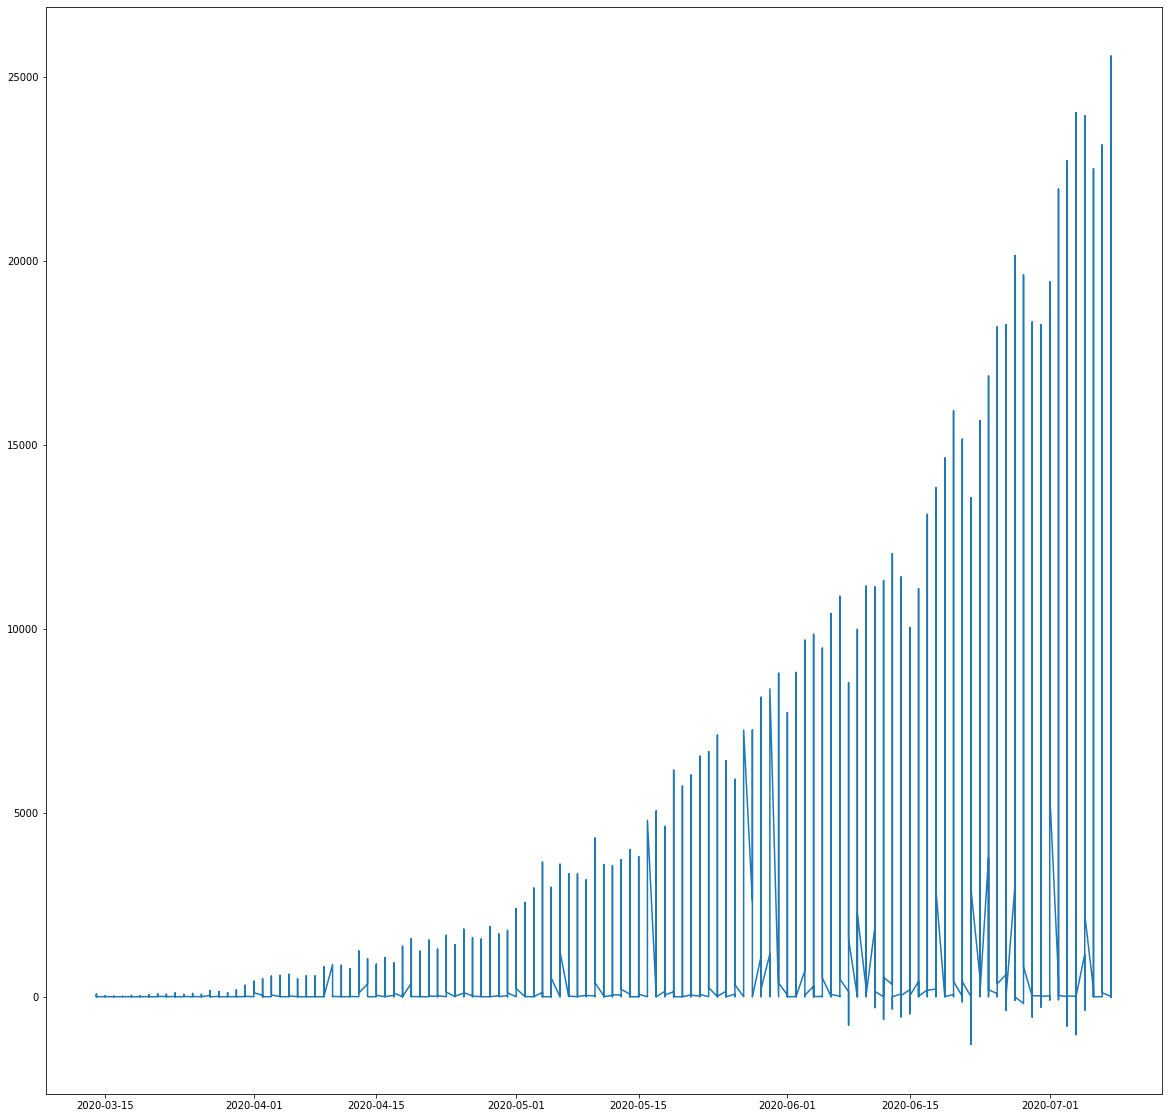

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(india_df['Date'], india_df['Confirmed'])


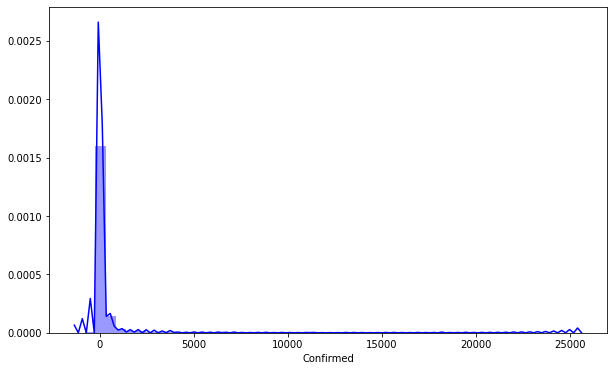

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(india_df["Confirmed"], color = 'b')

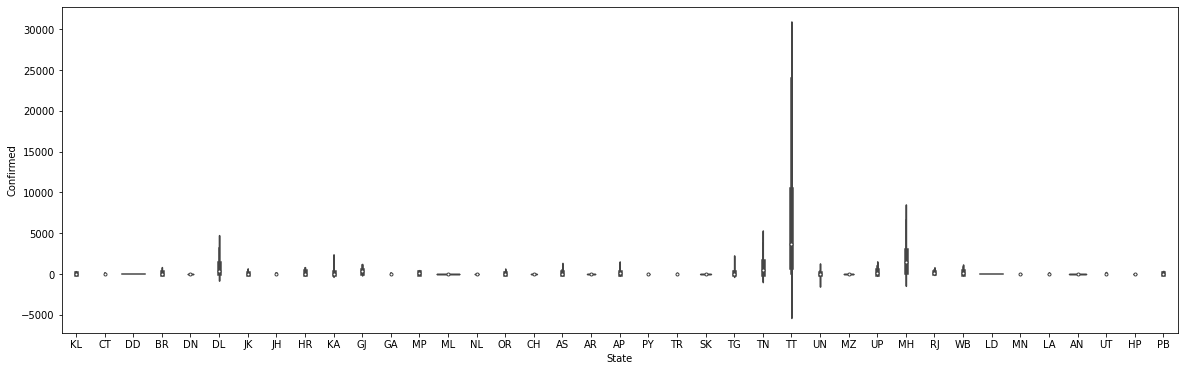

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(y="Confirmed", x="State", data = india_df)

In [ ]:
india_prophet_df = india_df[['Date', 'Confirmed']] 

In [ ]:
india_prophet_df

,Date,Confirmed
1928,2020-03-14,19
1917,2020-03-14,0
1918,2020-03-14,0
1915,2020-03-14,0
1920,2020-03-14,0
...,...,...
1135,2020-07-08,749
1134,2020-07-08,696
1133,2020-07-08,11
1149,2020-07-08,6


In [ ]:
india_prophet_df = india_prophet_df.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [ ]:
india_prophet_df

,ds,y
1928,2020-03-14,19
1917,2020-03-14,0
1918,2020-03-14,0
1915,2020-03-14,0
1920,2020-03-14,0
...,...,...
1135,2020-07-08,749
1134,2020-07-08,696
1133,2020-07-08,11
1149,2020-07-08,6


In [ ]:
m = Prophet()
m.fit(india_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forcasting into the future
#future = m.make_future_dataframe(periods=365)
future = m.make_future_dataframe(periods=20, freq='D')
forecast = m.predict(future)

In [34]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4563,2020-07-09,1234.757022,-715.665786,3306.960437,1234.754686,1234.781743,4.959833,4.959833,4.959833,4.959833,4.959833,4.959833,0.0,0.0,0.0,1239.716855
4564,2020-07-10,1258.877457,-666.474146,3338.955637,1258.499215,1259.362535,4.000155,4.000155,4.000155,4.000155,4.000155,4.000155,0.0,0.0,0.0,1262.877612
4565,2020-07-11,1282.997892,-726.774014,3321.894434,1281.988723,1284.422994,20.789366,20.789366,20.789366,20.789366,20.789366,20.789366,0.0,0.0,0.0,1303.787259
4566,2020-07-12,1307.118327,-677.423981,3261.738515,1305.353241,1309.553858,13.199035,13.199035,13.199035,13.199035,13.199035,13.199035,0.0,0.0,0.0,1320.317362
4567,2020-07-13,1331.238762,-601.961671,3314.114774,1328.512959,1334.905059,-27.867513,-27.867513,-27.867513,-27.867513,-27.867513,-27.867513,0.0,0.0,0.0,1303.371249
4568,2020-07-14,1355.359197,-570.246287,3298.208999,1351.305038,1360.206282,-17.300800,-17.300800,-17.300800,-17.300800,-17.300800,-17.300800,0.0,0.0,0.0,1338.058397
4569,2020-07-15,1379.479632,-606.586931,3342.265817,1374.124503,1385.905767,2.219924,2.219924,2.219924,2.219924,2.219924,2.219924,0.0,0.0,0.0,1381.699556
4570,2020-07-16,1403.600067,-717.433784,3408.366640,1396.700051,1411.867956,4.959833,4.959833,4.959833,4.959833,4.959833,4.959833,0.0,0.0,0.0,1408.559900
4571,2020-07-17,1427.720502,-675.867297,3322.394788,1419.173236,1437.528723,4.000155,4.000155,4.000155,4.000155,4.000155,4.000155,0.0,0.0,0.0,1431.720657
4572,2020-07-18,1451.840937,-476.954105,3402.553542,1441.333887,1463.501680,20.789366,20.789366,20.789366,20.789366,20.789366,20.789366,0.0,0.0,0.0,1472.630304


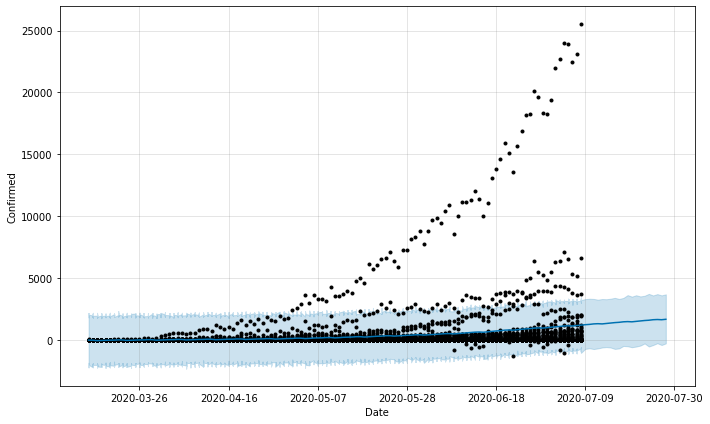

In [33]:
figure = m.plot(forecast, xlabel='Date', ylabel='Confirmed')

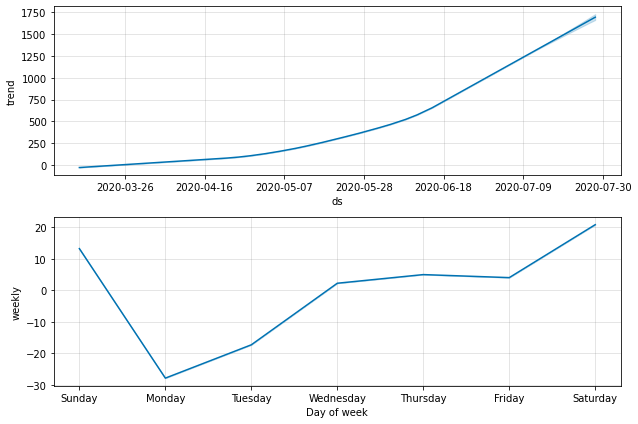

In [ ]:
figure3 = m.plot_components(forecast)